# e-Commerce (Walmart) Sales

## By Fridha Megantara Putra

## import library dan data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import data dan melakukan pengecekan dimensi,informasi,statistik deskriptif,missing value,dan duplikat data


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('walmart.csv')  # Sesuaikan dengan path dan nama file dataset Anda

# Memeriksa dimensi data
print("Dimensi Data:", df.shape)

# Melihat sekilas data
print("\nSekilas Data:")
print(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa nilai hilang
print("\nNilai Hilang per Kolom:")
print(df.isnull().sum())

# Memeriksa duplikasi
print("\nJumlah Baris Duplikat:", df.duplicated().sum())


Dimensi Data: (550068, 10)

Sekilas Data:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 co

In [3]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

## Total Pembelian Berdasarkan Kategori Produk

Total pembelian berdasarkan kategori produk:


| Product_Category |    Purchase    |
|------------------|----------------|
| 1                | 1910013754     |
| 2                | 268516186      |
| 3                | 204084713      |
| 4                | 27380488       |
| 5                | 941835229      |
| 6                | 324150302      |
| 7                | 60896731       |
| 8                | 854318799      |
| 9                | 6370324        |
| 10               | 100837301      |
| 11               | 113791115      |
| 12               | 5331844        |
| 13               | 4008601        |
| 14               | 20014696       |
| 15               | 92969042       |
| 16               | 145120612      |
| 17               | 5878699        |
| 18               | 9290201        |
| 19               | 59378          |
| 20               | 944727         |


Total pembelian berdasarkan kategori produk:
    Product_Category    Purchase
0                  1  1910013754
1                  2   268516186
2                  3   204084713
3                  4    27380488
4                  5   941835229
5                  6   324150302
6                  7    60896731
7                  8   854318799
8                  9     6370324
9                 10   100837301
10                11   113791115
11                12     5331844
12                13     4008601
13                14    20014696
14                15    92969042
15                16   145120612
16                17     5878699
17                18     9290201
18                19       59378
19                20      944727


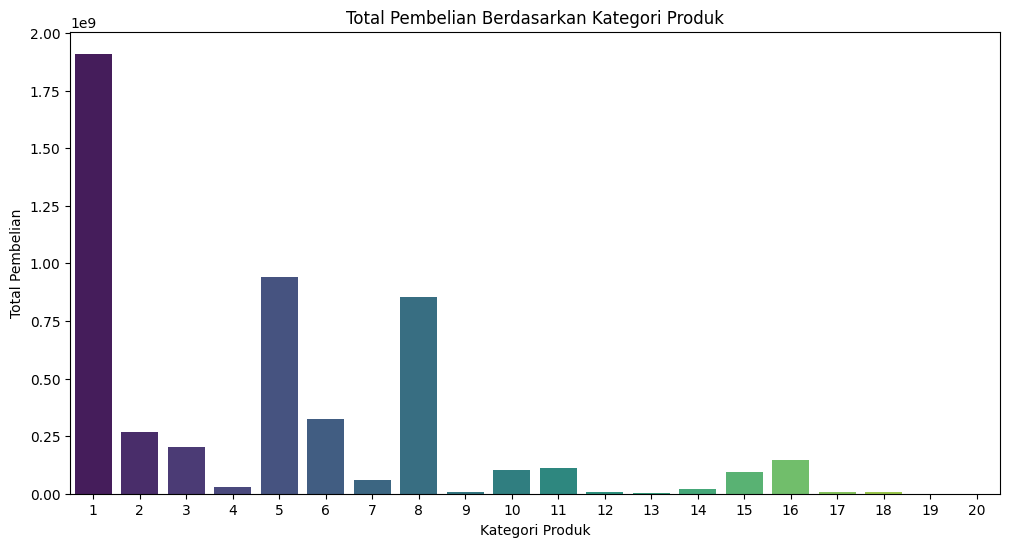

In [4]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung total pembelian
total_purchase_by_product_category = df.groupby('Product_Category')['Purchase'].sum().reset_index()

# Menampilkan hasil
print("Total pembelian berdasarkan kategori produk:")
print(total_purchase_by_product_category)

# Memplot data menggunakan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Purchase', data=total_purchase_by_product_category, palette='viridis')
plt.title('Total Pembelian Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pembelian')
plt.show()

## Customer Segmentation berdasarkan usia

### Pekerjaan yang Paling Umum dalam Setiap Kelompok Usia

dapat kita ketahui pekerjaan yang paling umum dalam setiap kelompok usia adalah


| Age   | Occupation | Count |
|-------|------------|-------|
| 0-17  | 10         | 10951 |
| 18-25 | 4          | 48241 |
| 26-35 | 0          | 34204 |
| 36-45 | 7          | 18762 |
| 46-50 | 1          | 7089  |
| 51-55 | 7          | 5355  |
| 55+   | 13         | 4870  |



Pekerjaan yang paling umum dalam setiap kelompok usia:
       Age  Occupation  Count
6     0-17          10  10951
17   18-25           4  48241
33   26-35           0  34204
60   36-45           7  18762
75   46-50           1   7089
101  51-55           7   5355
126    55+          13   4870


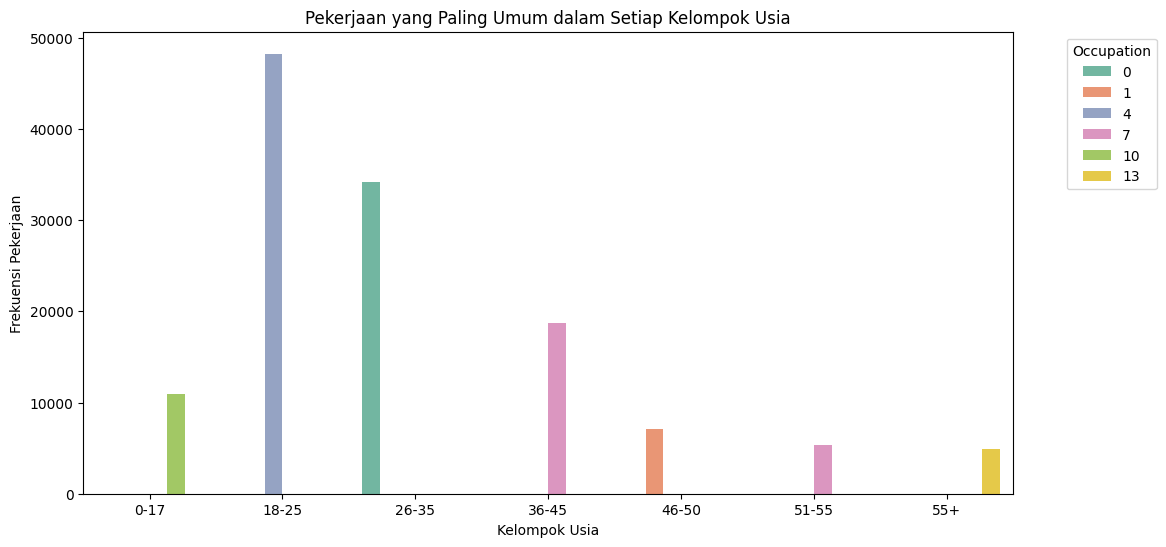

In [5]:
age_occupation_counts = df.groupby(['Age', 'Occupation']).size().reset_index(name='Count')

# Menemukan pekerjaan yang paling umum dalam setiap kelompok usia
most_common_occupation_per_age_group = age_occupation_counts.loc[age_occupation_counts.groupby('Age')['Count'].idxmax()]

# Menampilkan hasil
print("Pekerjaan yang paling umum dalam setiap kelompok usia:")
print(most_common_occupation_per_age_group)

# Memplot data
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='Occupation', data=most_common_occupation_per_age_group, palette='Set2')
plt.title('Pekerjaan yang Paling Umum dalam Setiap Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Frekuensi Pekerjaan')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Total Pembelian per Kelompok Usia

Kelompok usia dengan jumlah pembelian terbanyak: 26-35 dengan jumlah pembelian 2031770578$

Kelompok usia dengan jumlah pembelian terbanyak: 26-35 dengan jumlah pembelian 2031770578


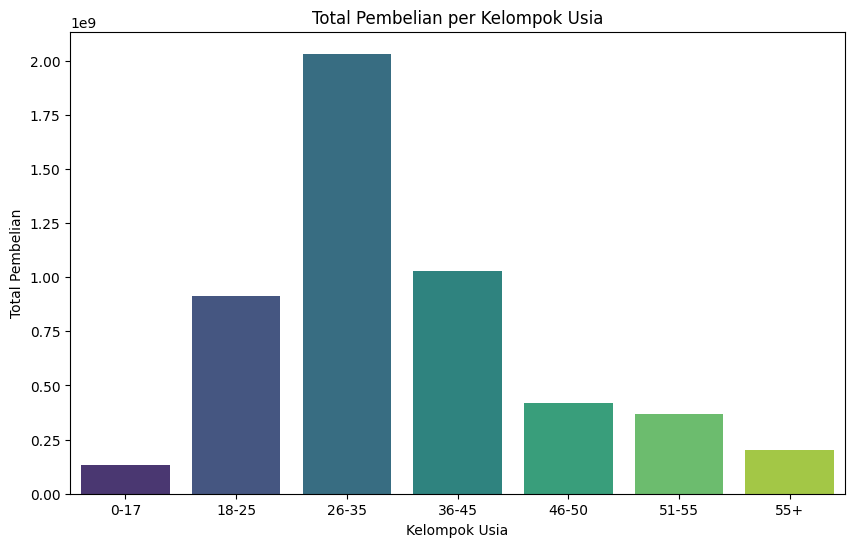

In [6]:
# Mengelompokkan data berdasarkan kelompok usia dan menjumlahkan pembelian
age_group_purchase = df.groupby('Age')['Purchase'].sum().reset_index()

# Menemukan kelompok usia dengan jumlah pembelian terbanyak
max_purchase_age_group = age_group_purchase.loc[age_group_purchase['Purchase'].idxmax()]

# Menampilkan hasil kelompok usia dengan jumlah pembelian terbanyak
print(f"Kelompok usia dengan jumlah pembelian terbanyak: {max_purchase_age_group['Age']} dengan jumlah pembelian {max_purchase_age_group['Purchase']}")

# Memplot data
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=age_group_purchase, palette='viridis')
plt.title('Total Pembelian per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Total Pembelian')
plt.show()

### Produk yang paling sering dibeli oleh setiap kelompok usia

Produk yang paling sering dibeli oleh setiap kelompok usia:

| Age   | Product_ID | Count |
|-------|------------|-------|
| 0-17  | P00255842  | 65    |
| 18-25 | P00265242  | 389   |
| 26-35 | P00265242  | 746   |
| 36-45 | P00025442  | 356   |
| 46-50 | P00265242  | 138   |
| 51-55 | P00265242  | 140   |
| 55+   | P00265242  | 104   |


In [7]:
age_product_counts = df.groupby(['Age', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk yang paling sering dibeli dalam setiap kelompok usia
most_frequent_product_per_age_group = age_product_counts.loc[age_product_counts.groupby('Age')['Count'].idxmax()]

# Menampilkan hasil
print("Produk yang paling sering dibeli oleh setiap kelompok usia:")
print(most_frequent_product_per_age_group)

Produk yang paling sering dibeli oleh setiap kelompok usia:
         Age Product_ID  Count
1600    0-17  P00255842     65
4608   18-25  P00265242    389
7952   26-35  P00265242    746
9203   36-45  P00025442    356
14455  46-50  P00265242    138
17397  51-55  P00265242    140
20069    55+  P00265242    104


### Produk yang Paling Sering Dibeli oleh Setiap Kelompok Usia

produk yang sering di beli  oleh setiap kelompok umur

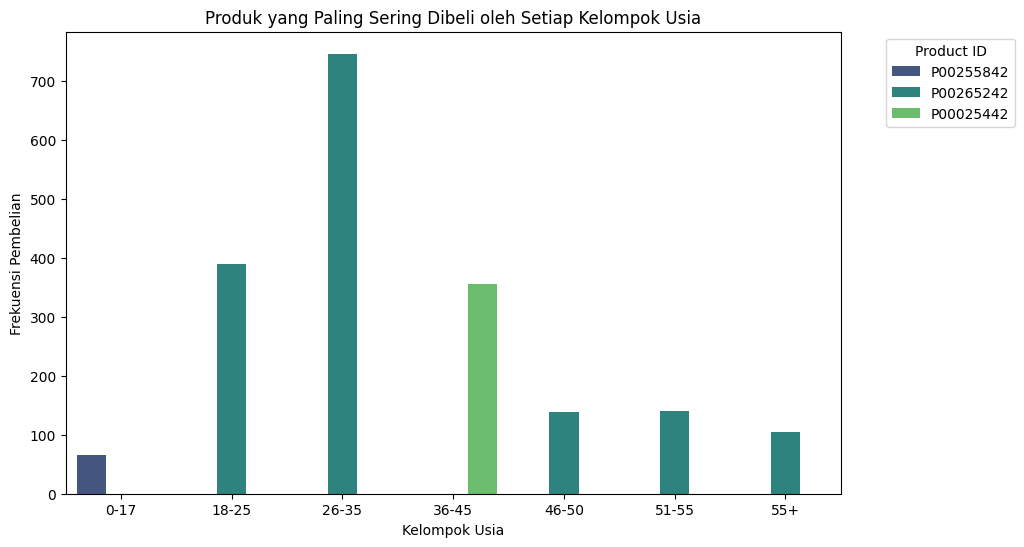

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat plot untuk produk yang paling sering dibeli oleh setiap kelompok usia
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Count', hue='Product_ID', data=most_frequent_product_per_age_group, palette='viridis')
plt.title('Produk yang Paling Sering Dibeli oleh Setiap Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Kota yang paling umum dihuni dalam setiap kelompok usia

Kota yang paling umum dihuni dalam setiap kelompok usia:

| Age   | City_Category | Count |
|-------|---------------|-------|
| 0-17  | C             | 7123  |
| 18-25 | B             | 43247 |
| 26-35 | B             | 91584 |
| 36-45 | B             | 47598 |
| 46-50 | B             | 20406 |
| 51-55 | B             | 17741 |
| 55+   | C             | 12769 |


Kota yang paling umum dihuni dalam setiap kelompok usia:
      Age City_Category  Count
2    0-17             C   7123
4   18-25             B  43247
7   26-35             B  91584
10  36-45             B  47598
13  46-50             B  20406
16  51-55             B  17741
20    55+             C  12769


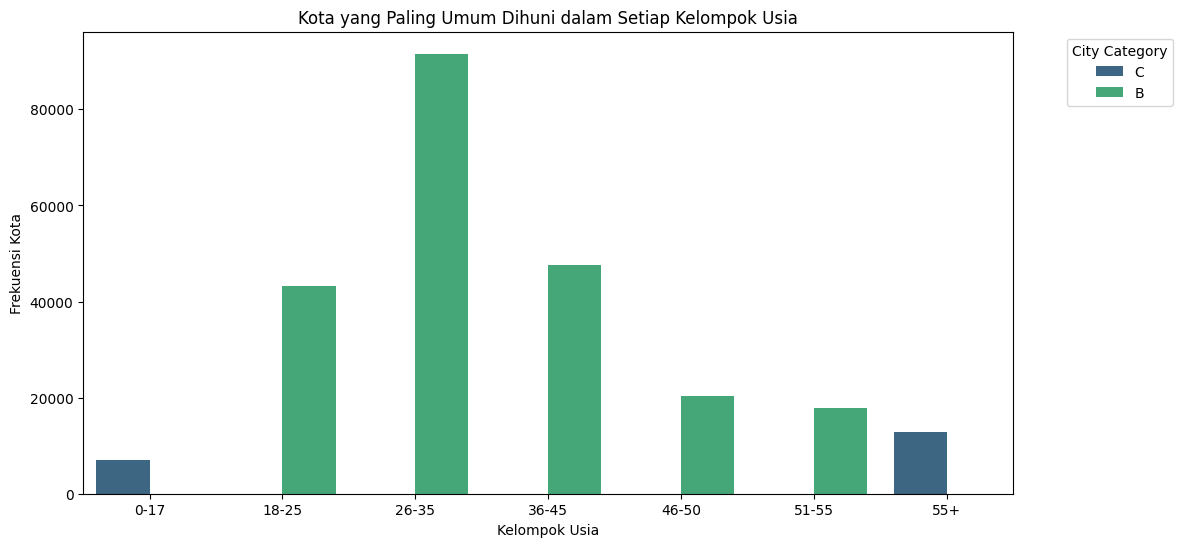

In [9]:
# Mengelompokkan data berdasarkan kelompok usia dan kota, lalu menghitung frekuensi masing-masing kota dalam setiap kelompok usia
age_city_counts = df.groupby(['Age', 'City_Category']).size().reset_index(name='Count')

# Menemukan kota yang paling umum dihuni dalam setiap kelompok usia
most_common_city_per_age_group = age_city_counts.loc[age_city_counts.groupby('Age')['Count'].idxmax()]

# Menampilkan hasil
print("Kota yang paling umum dihuni dalam setiap kelompok usia:")
print(most_common_city_per_age_group)

# Memplot data
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='City_Category', data=most_common_city_per_age_group, palette='viridis')
plt.title('Kota yang Paling Umum Dihuni dalam Setiap Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Frekuensi Kota')
plt.legend(title='City Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Customer Segmentation berdasarkan status pernikahan

### Produk yang Paling Sering Dibeli oleh Orang yang Sudah Menikah dan Belum Menikah

Produk yang paling sering dibeli oleh orang yang sudah menikah dan belum menikah:


| Marital_Status | Product_ID | Count |
|----------------|------------|-------|
| 0              | P00265242  | 1087  |
| 1              | P00265242  | 793   |


Produk yang paling sering dibeli oleh orang yang sudah menikah dan belum menikah:
      Marital_Status Product_ID  Count
2468               0  P00265242   1087
5976               1  P00265242    793


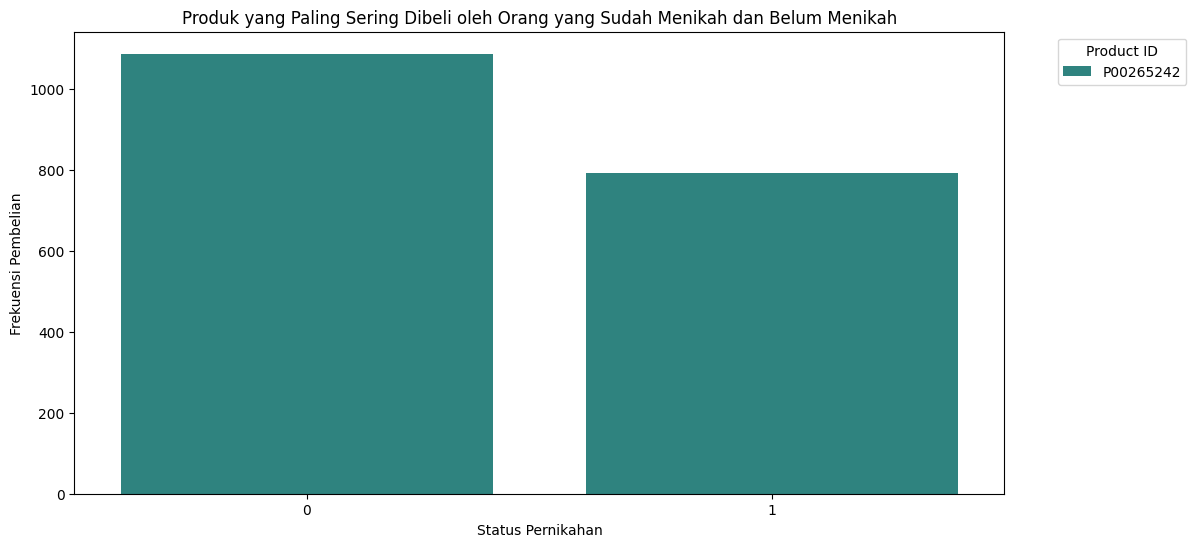

In [10]:
# Mengelompokkan data berdasarkan status pernikahan dan produk, lalu menghitung frekuensi pembelian
marital_product_counts = df.groupby(['Marital_Status', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk yang paling sering dibeli dalam setiap status pernikahan
most_frequent_product_per_marital_status = marital_product_counts.loc[marital_product_counts.groupby('Marital_Status')['Count'].idxmax()]

# Menampilkan hasil
print("Produk yang paling sering dibeli oleh orang yang sudah menikah dan belum menikah:")
print(most_frequent_product_per_marital_status)

# Memplot data
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Count', hue='Product_ID', data=most_frequent_product_per_marital_status, palette='viridis')
plt.title('Produk yang Paling Sering Dibeli oleh Orang yang Sudah Menikah dan Belum Menikah')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Total Pembelian Berdasarkan Status Pernikaha

Total pembelian berdasarkan status pernikahan:

| Marital_Status |    Purchase    |
|----------------|----------------|
| 0              | 3008927447     |
| 1              | 2086885295     |


Total pembelian berdasarkan status pernikahan:
   Marital_Status    Purchase
0               0  3008927447
1               1  2086885295


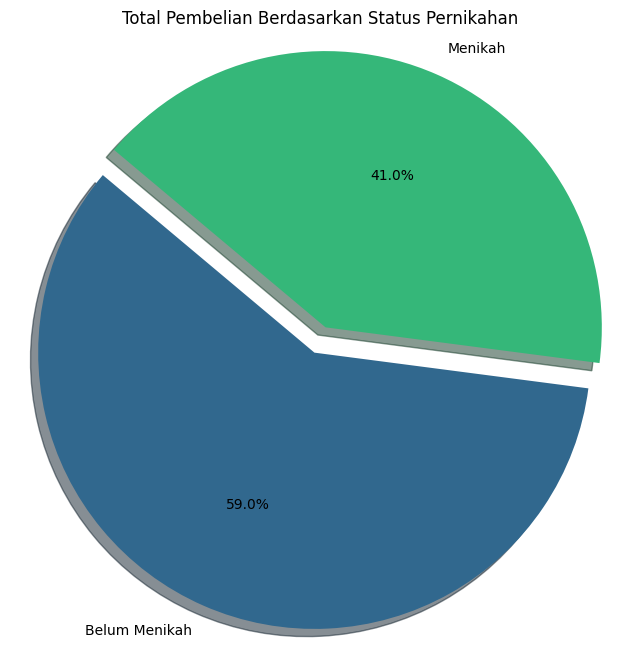

In [11]:
# Mengelompokkan data berdasarkan status pernikahan dan menghitung total pembelian
total_purchase_by_marital_status = df.groupby('Marital_Status')['Purchase'].sum().reset_index()

# Menampilkan hasil
print("Total pembelian berdasarkan status pernikahan:")
print(total_purchase_by_marital_status)

# Memplot data menggunakan pie chart dengan palet warna viridis
labels = ['Belum Menikah', 'Menikah']  # 0 untuk belum menikah, 1 untuk menikah
sizes = total_purchase_by_marital_status['Purchase']
colors = sns.color_palette('viridis', len(sizes))
explode = (0.1, 0)  # memisahkan potongan pertama

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Pembelian Berdasarkan Status Pernikahan')
plt.axis('equal')  # memastikan pie chart berbentuk lingkaran
plt.show()

## Customer Segmentation berdasarkan jenis kelamin

### produk terlaris untuk setiap jenis kelamin

Produk terlaris yang dibeli oleh setiap jenis kelamin:

| Gender | Product_ID | Count |
|--------|------------|-------|
| F      | P00265242  | 508   |
| M      | P00265242  | 1372  |


Produk terlaris yang dibeli oleh setiap jenis kelamin:
     Gender Product_ID  Count
2365      F  P00265242    508
5872      M  P00265242   1372


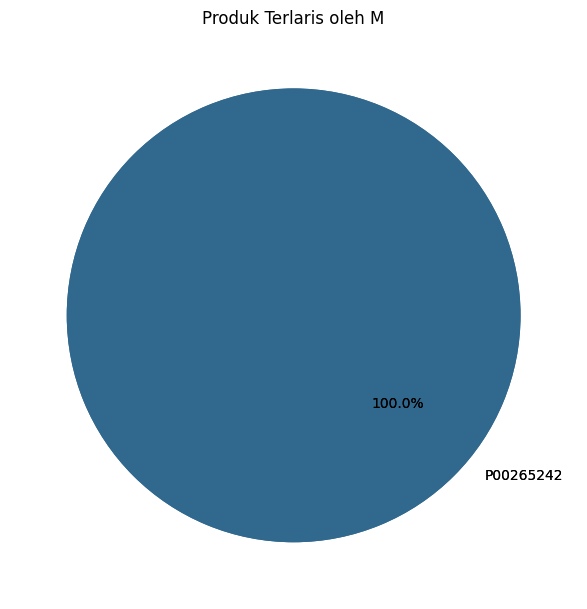

In [12]:
# Mengelompokkan data berdasarkan jenis kelamin dan produk, lalu menghitung frekuensi pembelian
product_counts_by_gender = df.groupby(['Gender', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk terlaris untuk setiap jenis kelamin
most_popular_product_by_gender = product_counts_by_gender.loc[product_counts_by_gender.groupby('Gender')['Count'].idxmax()]

# Menampilkan hasil
print("Produk terlaris yang dibeli oleh setiap jenis kelamin:")
print(most_popular_product_by_gender)

# Memplot data menggunakan pie chart dengan palet warna Viridis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
colors = sns.color_palette('viridis', n_colors=len(most_popular_product_by_gender))
for i, gender in enumerate(most_popular_product_by_gender['Gender'].unique()):
    sizes = most_popular_product_by_gender[most_popular_product_by_gender['Gender'] == gender]['Count']
    labels = most_popular_product_by_gender[most_popular_product_by_gender['Gender'] == gender]['Product_ID']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Produk Terlaris oleh ' + gender)

plt.tight_layout()
plt.show()

### Total pembelian per kelompok jenis kelamin

Total pembelian per kelompok jenis kelamin:

| Gender |    Purchase    |
|--------|----------------|
| F      | 1186232642     |
| M      | 3909580100     |



Total pembelian per kelompok jenis kelamin:
  Gender    Purchase
0      F  1186232642
1      M  3909580100


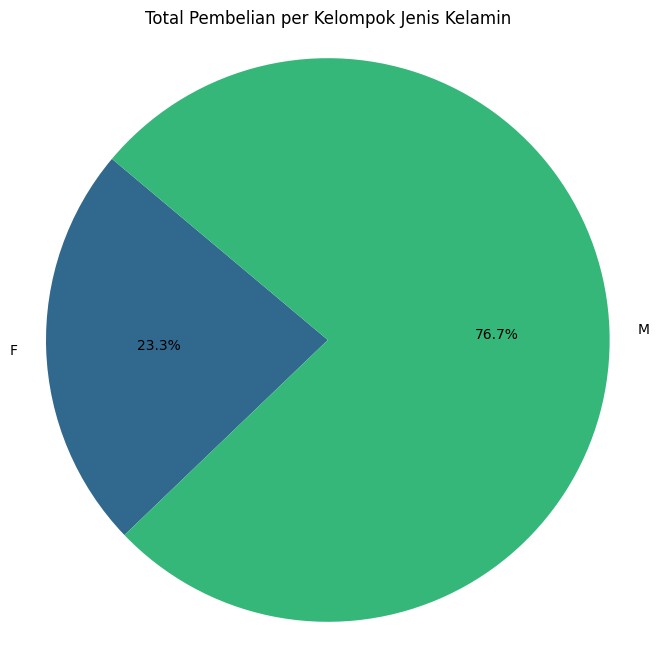

In [13]:
# Mengelompokkan data berdasarkan jenis kelamin dan menghitung total pembelian
total_purchase_by_gender = df.groupby('Gender')['Purchase'].sum().reset_index()

# Menampilkan hasil
print("Total pembelian per kelompok jenis kelamin:")
print(total_purchase_by_gender)

# Memplot data menggunakan pie chart dengan palette warna Viridis
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', n_colors=len(total_purchase_by_gender))
plt.pie(total_purchase_by_gender['Purchase'], labels=total_purchase_by_gender['Gender'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Total Pembelian per Kelompok Jenis Kelamin')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Customer Segmentation Berdasarkan Pekerjaan

### Produk yang paling sering dibeli oleh setiap jenis pekerjaan

Produk yang paling sering dibeli oleh setiap jenis pekerjaan:

| Occupation | Product_ID | Count |
|------------|------------|-------|
| 0          | P00265242  | 206   |
| 1          | P00265242  | 159   |
| 2          | P00265242  | 86    |
| 3          | P00117942  | 50    |
| 4          | P00265242  | 287   |
| 5          | P00265242  | 38    |
| 6          | P00265242  | 72    |
| 7          | P00265242  | 193   |
| 8          | P00112142  | 8     |
| 9          | P00034742  | 26    |
| 10         | P00145042  | 65    |
| 11         | P00265242  | 42    |
| 12         | P00057642  | 131   |
| 13         | P00265242  | 42    |
| 14         | P00265242  | 110   |
| 15         | P00025442  | 50    |
| 16         | P00265242  | 79    |
| 17         | P00057642  | 149   |
| 18         | P00265242  | 25    |
| 19         | P00265242  | 34    |
| 20         | P00265242  | 91    |




Produk yang paling sering dibeli oleh setiap jenis pekerjaan:
       Occupation Product_ID  Count
2275            0  P00265242    206
5378            1  P00265242    159
8303            2  P00265242     86
10000           3  P00117942     50
14121           4  P00265242    287
16696           5  P00265242     38
19293           6  P00265242     72
22281           7  P00265242    193
23482           8  P00112142      8
24424           9  P00034742     26
26871          10  P00145042     65
29788          11  P00265242     42
30874          12  P00057642    131
34474          13  P00265242     42
36972          14  P00265242    110
37921          15  P00025442     50
41973          16  P00265242     79
43293          17  P00057642    149
47112          18  P00265242     25
49383          19  P00265242     34
52261          20  P00265242     91


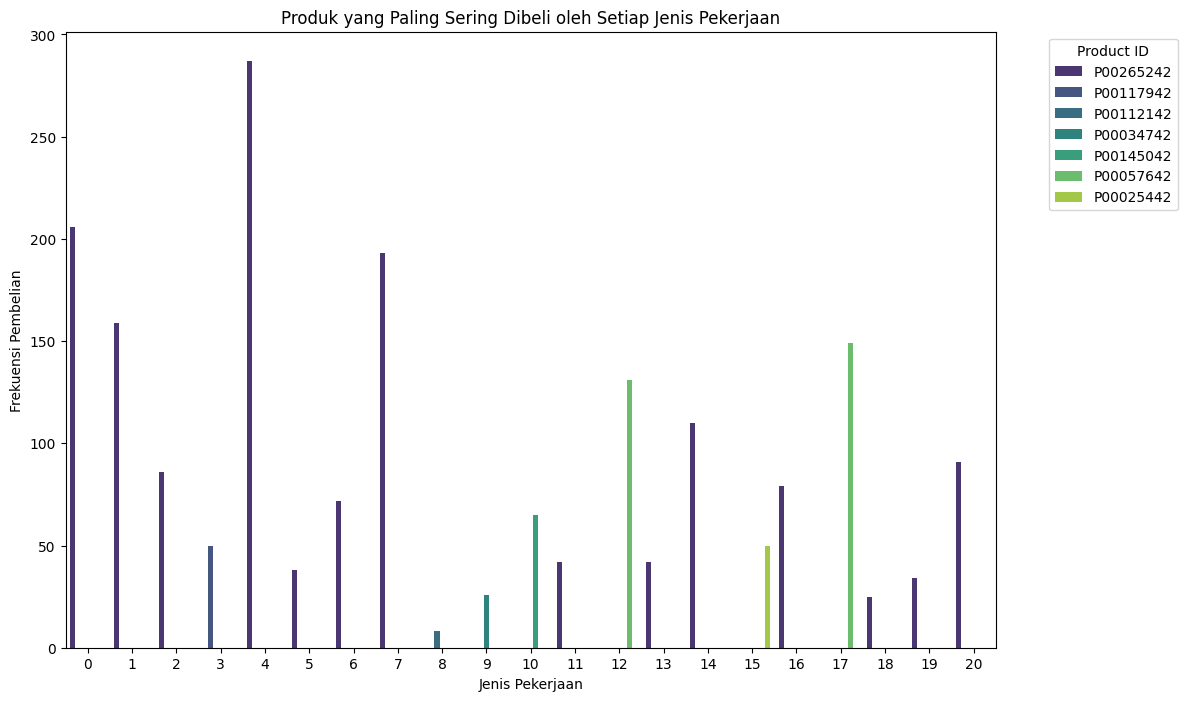

In [14]:
# Mengelompokkan data berdasarkan pekerjaan dan produk, lalu menghitung frekuensi pembelian
product_counts_by_occupation = df.groupby(['Occupation', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk yang paling sering dibeli untuk setiap jenis pekerjaan
most_popular_product_by_occupation = product_counts_by_occupation.loc[product_counts_by_occupation.groupby('Occupation')['Count'].idxmax()]

# Menampilkan hasil
print("Produk yang paling sering dibeli oleh setiap jenis pekerjaan:")
print(most_popular_product_by_occupation)

# Memplot data menggunakan bar plot dengan palet warna Viridis
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Count', hue='Product_ID', data=most_popular_product_by_occupation, palette='viridis')
plt.title('Produk yang Paling Sering Dibeli oleh Setiap Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Total pembelian per jenis pekerjaan

Total pembelian per jenis pekerjaan:

| Occupation |   Purchase   |
|------------|--------------|
| 0          | 635406958    |
| 1          | 424614144    |
| 2          | 238028583    |
| 3          | 162002168    |
| 4          | 666244484    |
| 5          | 113649759    |
| 6          | 188416784    |
| 7          | 557371587    |
| 8          | 14737388     |
| 9          | 54340046     |
| 10         | 115844465    |
| 11         | 106751618    |
| 12         | 305449446    |
| 13         | 71919481     |
| 14         | 259454692    |
| 15         | 118960211    |
| 16         | 238346955    |
| 17         | 393281453    |
| 18         | 60721461     |
| 19         | 73700617     |
| 20         | 296570442    |




### 

Total pembelian per jenis pekerjaan:
    Occupation   Purchase
0            0  635406958
1            1  424614144
2            2  238028583
3            3  162002168
4            4  666244484
5            5  113649759
6            6  188416784
7            7  557371587
8            8   14737388
9            9   54340046
10          10  115844465
11          11  106751618
12          12  305449446
13          13   71919481
14          14  259454692
15          15  118960211
16          16  238346955
17          17  393281453
18          18   60721461
19          19   73700617
20          20  296570442


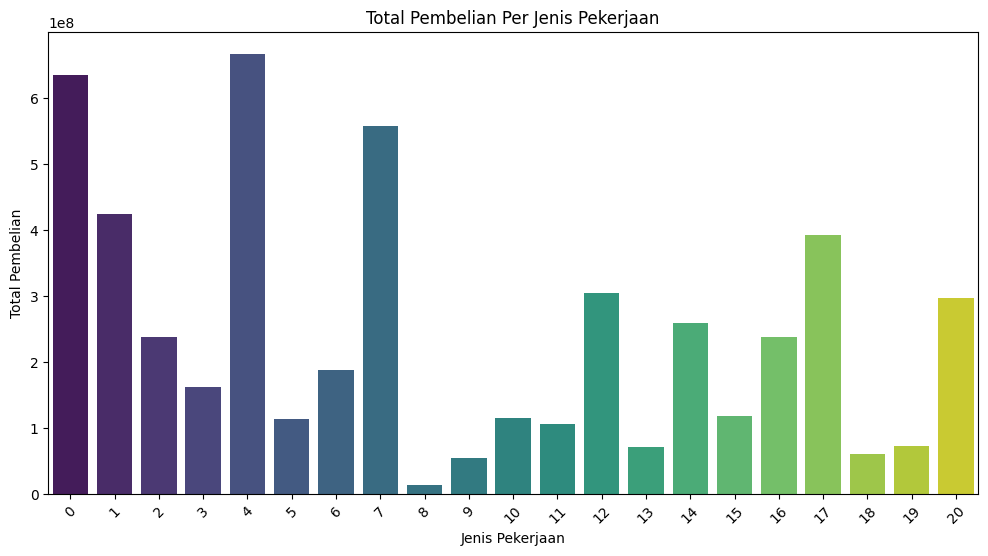

In [15]:
# Mengelompokkan data berdasarkan pekerjaan dan menghitung total pembelian
total_purchase_by_occupation = df.groupby('Occupation')['Purchase'].sum().reset_index()

# Menampilkan hasil
print("Total pembelian per jenis pekerjaan:")
print(total_purchase_by_occupation)

# Memplot data menggunakan diagram batang dengan palet warna Viridis
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Purchase', data=total_purchase_by_occupation, palette='viridis')
plt.title('Total Pembelian Per Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=45)
plt.show()

## Customer Segmentation Berdasarkan Lamanya Menetap Di Kota A

### Produk Terlaris - Tinggal di Kota A Berdasarkan Lama Tinggal

dapat kita ketahui produk terlaris pada Kota A adalah : P00265242

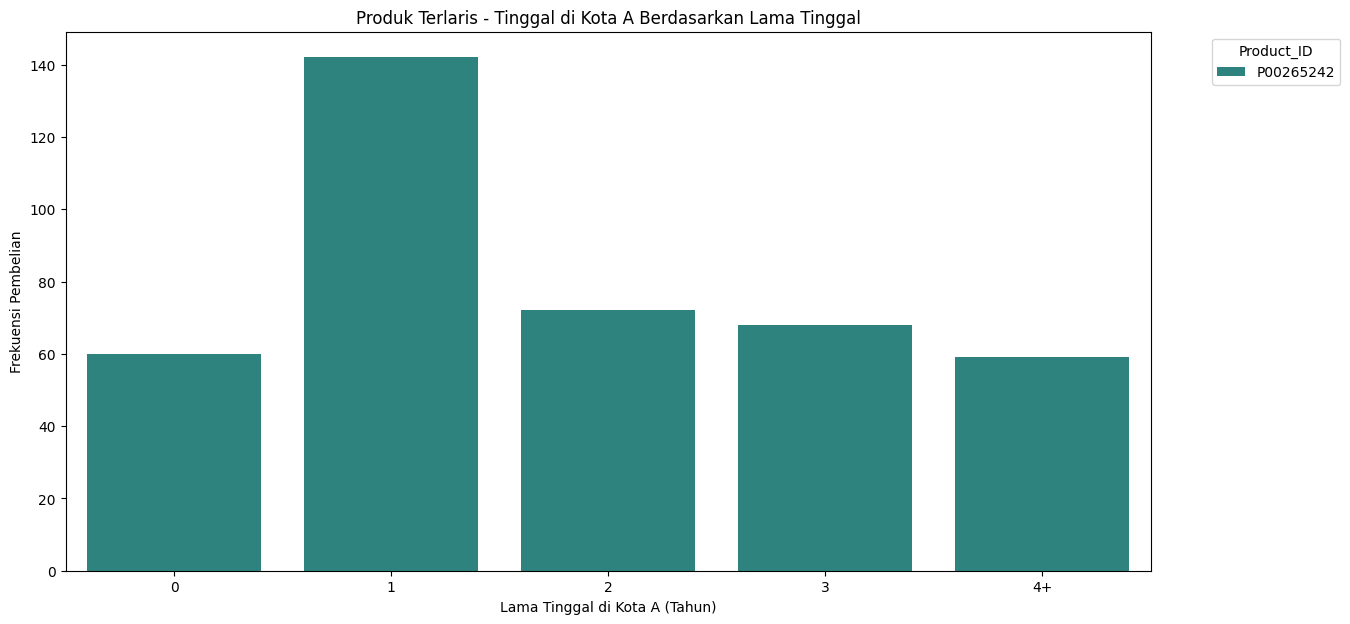

In [16]:
# Menyaring data untuk hanya kelompok Stay_In_Current_City_Years "A" di kota A
city_a_data = df[df['City_Category'] == 'A']

# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan Product_ID, kemudian menghitung total pembelian
product_counts_by_years = city_a_data.groupby(['Stay_In_Current_City_Years', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk terlaris untuk setiap kelompok Stay_In_Current_City_Years
most_popular_product_by_years = product_counts_by_years.loc[product_counts_by_years.groupby('Stay_In_Current_City_Years')['Count'].idxmax()]

# Memplot data menggunakan diagram batang
plt.figure(figsize=(14, 7))
sns.barplot(x='Stay_In_Current_City_Years', y='Count', hue='Product_ID', data=most_popular_product_by_years, palette='viridis')
plt.title('Produk Terlaris - Tinggal di Kota A Berdasarkan Lama Tinggal')
plt.xlabel('Lama Tinggal di Kota A (Tahun)')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Product_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Pembelian terbanyak bagi setiap kelompok Berdasarkan Lama Tinggal yang tinggal di kota A:

Pembelian terbanyak bagi setiap kelompok Berdasarkan Lama Tinggal yang tinggal di kota A:

| Stay_In_Current_City_Years | Purchase |
|-----------------------------|----------|
| 0                           | 23960    |
| 1                           | 23958    |
| 2                           | 23961    |
| 3                           | 23939    |
| 4+                          | 23940    |


Pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota A:
  Stay_In_Current_City_Years  Purchase
0                          0     23960
1                          1     23958
2                          2     23961
3                          3     23939
4                         4+     23940


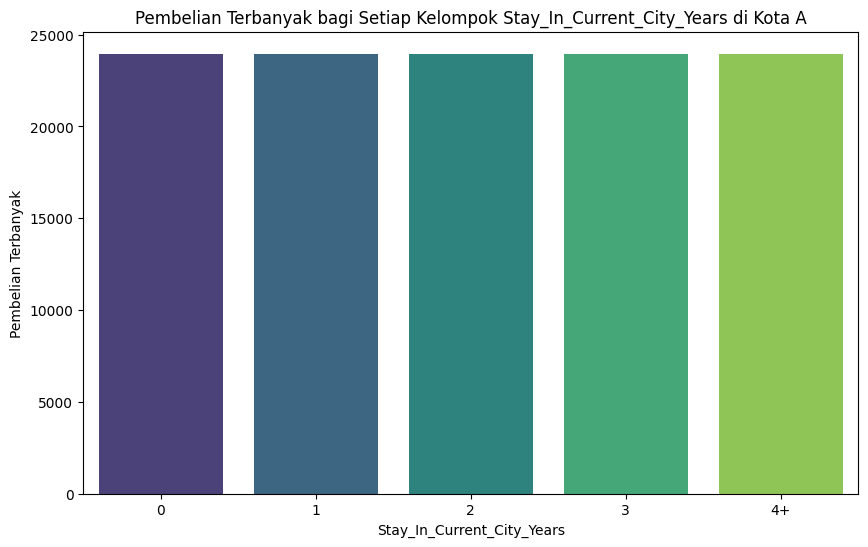

In [17]:
# Memfilter data untuk kota A
df_city_A = df[df['City_Category'] == 'A']
# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan menghitung pembelian maksimum
max_purchase_by_years = df_city_A.groupby('Stay_In_Current_City_Years')['Purchase'].max().reset_index()

# Menampilkan hasil
print("Pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota A:")
print(max_purchase_by_years)

# Memplot hasil menggunakan palet warna Viridis
plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=max_purchase_by_years, palette='viridis')
plt.title('Pembelian Terbanyak bagi Setiap Kelompok Stay_In_Current_City_Years di Kota A')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Pembelian Terbanyak')
plt.show()

## Customer Segmentation Berdasarkan Lamanya Menetap Di Kota B

### Produk Terlaris - di Kota B Berdasarkan Lama Tinggal


produk terlaris berdasarkan lama tinggal dapat di ketahui orang dengan lama tinggal :

0 produk yang paling laris adalah P00112142 dan sisanya P00265242

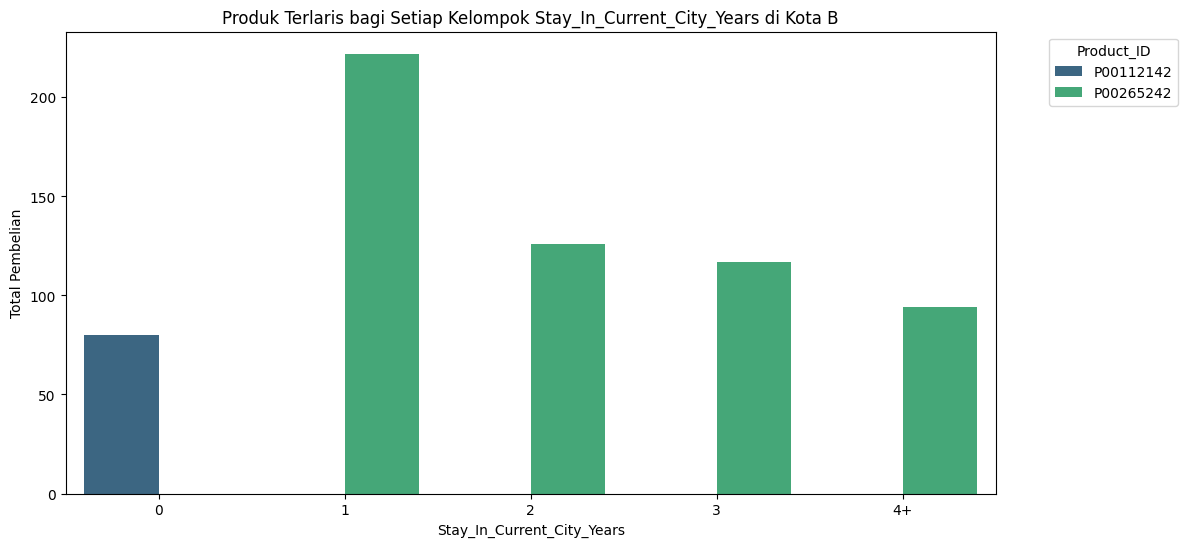

In [18]:
# Menyaring data untuk kota B
df_b_city = df[df['City_Category'] == 'B']

# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan Product_ID, lalu menghitung total pembelian
product_counts_by_years = df_b_city.groupby(['Stay_In_Current_City_Years', 'Product_ID']).size().reset_index(name='Count')


# Menemukan produk terlaris untuk setiap Stay_In_Current_City_Years
most_popular_product_by_years = product_counts_by_years.loc[product_counts_by_years.groupby('Stay_In_Current_City_Years')['Count'].idxmax()]

# Memplot data menggunakan bar chart dengan palet warna Viridis
plt.figure(figsize=(12, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Count', hue='Product_ID', data=most_popular_product_by_years, palette='viridis')
plt.title('Produk Terlaris bagi Setiap Kelompok Stay_In_Current_City_Years di Kota B')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Total Pembelian')
plt.legend(title='Product_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Pembelian terbanyak bagi setiap kelompok Berdasarkan Lama Tinggal yang tinggal di kota B:

Pembelian terbanyak bagi setiap kelompok Lama Tinggal di kota B:

| Stay_In_Current_City_Years |   Purchase   |
|-----------------------------|--------------|
| 0                           | 255389454    |
| 1                           | 765647432    |
| 2                           | 384010246    |
| 3                           | 392329940    |
| 4+                          | 318156533    |


Pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota B:
  Stay_In_Current_City_Years   Purchase
0                          0  255389454
1                          1  765647432
2                          2  384010246
3                          3  392329940
4                         4+  318156533


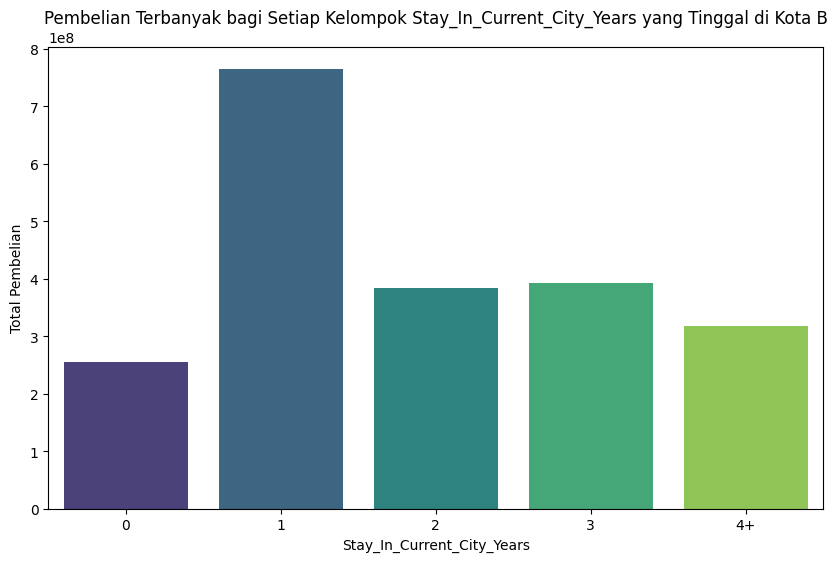

In [19]:
# Menyaring data untuk kelompok Stay_In_Current_City_Years yang tinggal di kota B
filtered_df = df[(df['City_Category'] == 'B')]

# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan menghitung total pembelian
purchase_by_years = filtered_df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()

# Menampilkan hasil
print("Pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota B:")
print(purchase_by_years)

# Memplot data menggunakan diagram batang dengan palet warna Viridis
plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=purchase_by_years, palette='viridis')
plt.title('Pembelian Terbanyak bagi Setiap Kelompok Stay_In_Current_City_Years yang Tinggal di Kota B')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Total Pembelian')
plt.show()

### Pembelian terbanyak bagi setiap kelompok Berdasarkan Lama Tinggal yang tinggal di kota C:

Total pembelian terbanyak bagi setiap kelompok Berdasar Lama Tinggal yang tinggal di kota C:

| Stay_In_Current_City_Years |   Purchase   |
|-----------------------------|--------------|
| 0                           | 210312058    |
| 1                           | 589463284    |
| 2                           | 321939497    |
| 3                           | 271444052    |
| 4+                          | 270648585    |


Total pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota C:
  Stay_In_Current_City_Years   Purchase
0                          0  210312058
1                          1  589463284
2                          2  321939497
3                          3  271444052
4                         4+  270648585


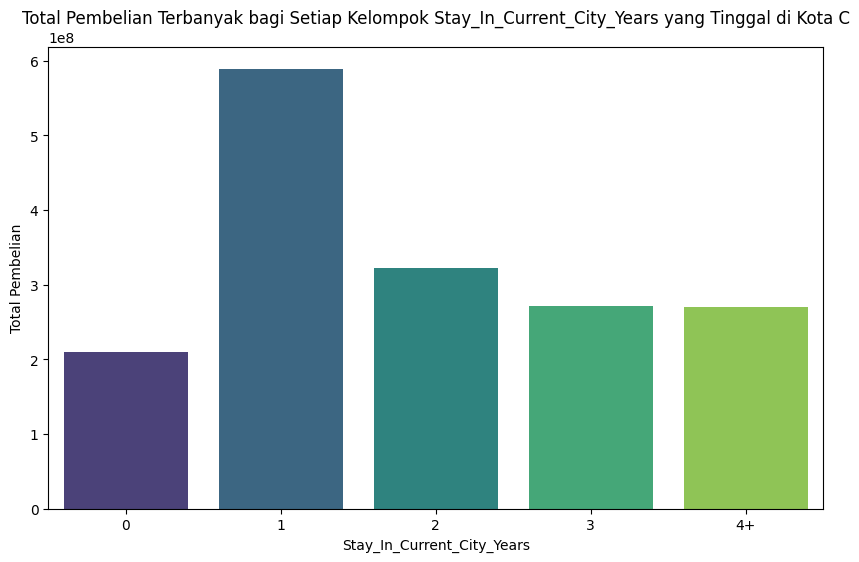

In [20]:
# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan menghitung total pembelian untuk setiap kelompok
purchase_by_city_years = df.groupby(['Stay_In_Current_City_Years', 'City_Category'])['Purchase'].sum().reset_index()

# Memfilter data untuk hanya kelompok Stay_In_Current_City_Years yang tinggal di kota C
purchase_city_C = purchase_by_city_years[purchase_by_city_years['City_Category'] == 'C']

# Menemukan total pembelian terbanyak untuk setiap kelompok
most_purchase_by_city_years = purchase_city_C.groupby('Stay_In_Current_City_Years')['Purchase'].max().reset_index()

# Menampilkan hasil
print("Total pembelian terbanyak bagi setiap kelompok Stay_In_Current_City_Years yang tinggal di kota C:")
print(most_purchase_by_city_years)

# Memplot data menggunakan diagram batang dengan palet warna Viridis
plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=purchase_city_C, palette='viridis')
plt.title('Total Pembelian Terbanyak bagi Setiap Kelompok Stay_In_Current_City_Years yang Tinggal di Kota C')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Total Pembelian')
plt.show()

### Produk Terlaris bagi Setiap Kelompok Lama Tinggal di Kota C 

Produk Terlaris bagi Setiap Kelompok Lama Tinggal di Kota C :

lama tinggal 0 tahun produk terlarisnya adalah P000025442, lama tinggal 1-3 tahun  produk terlarisnya P00265242,sedangkan untuk yang tinggal lebih dari 4 tahun produk terlarisnya P00112142 

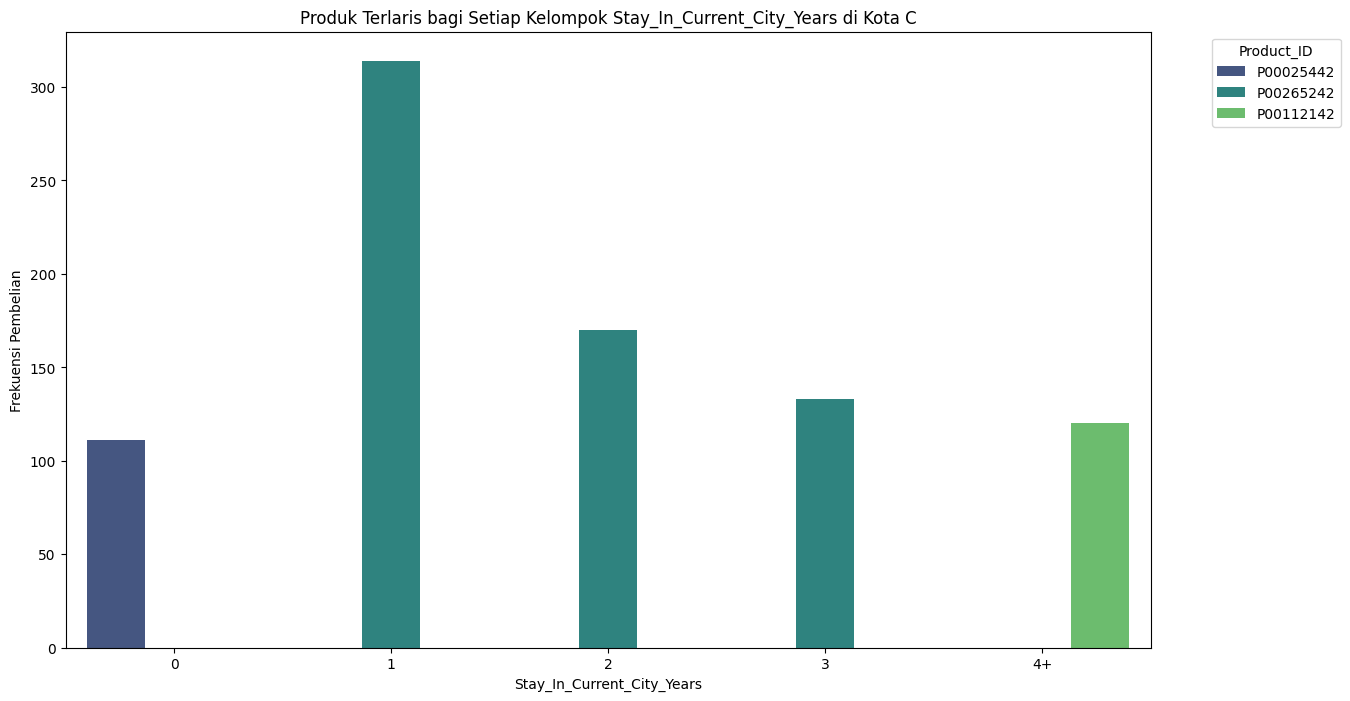

In [21]:


# Filter data untuk kota 'C'
df_city_C = df[df['City_Category'] == 'C']

# Mengelompokkan data berdasarkan Stay_In_Current_City_Years dan Product_ID, lalu menghitung frekuensi pembelian
product_counts_by_years = df_city_C.groupby(['Stay_In_Current_City_Years', 'Product_ID']).size().reset_index(name='Count')

# Menemukan produk terlaris untuk setiap kelompok Stay_In_Current_City_Years
most_popular_product_by_years = product_counts_by_years.loc[product_counts_by_years.groupby('Stay_In_Current_City_Years')['Count'].idxmax()]

# Memplot data menggunakan diagram batang dengan palet warna Viridis
plt.figure(figsize=(14, 8))
sns.barplot(x='Stay_In_Current_City_Years', y='Count', hue='Product_ID', data=most_popular_product_by_years, palette='viridis')
plt.title('Produk Terlaris bagi Setiap Kelompok Stay_In_Current_City_Years di Kota C')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Frekuensi Pembelian')
plt.legend(title='Product_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()